LANGKAH 2: Collection & Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IPK                10 non-null     float64
 1   Jumlah_Absensi     10 non-null     int64  
 2   Waktu_Belajar_Jam  10 non-null     int64  
 3   Lulus              10 non-null     int64  
 4   Rasio_Absensi      10 non-null     float64
 5   IPK_x_Study        10 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 608.0 bytes
None

Data Head:
   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus  Rasio_Absensi  IPK_x_Study
0  3.8               3                 10      1       0.214286         38.0
1  2.5               8                  5      0       0.571429         12.5
2  3.4               4                  7      1       0.285714         23.8
3  2.1              12                  2      0       0.857143          4.2
4  3.9               2       

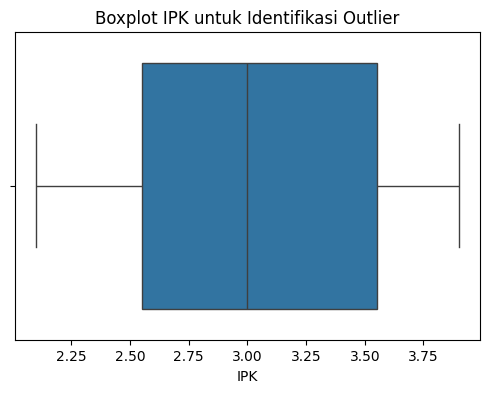


LANGKAH 4: Exploratory Data Analysis (EDA)

Statistik Deskriptif:
             IPK  Jumlah_Absensi  Waktu_Belajar_Jam      Lulus  Rasio_Absensi  \
count  10.000000        10.00000          10.000000  10.000000      10.000000   
mean    3.030000         6.00000           6.400000   0.500000       0.428571   
std     0.639531         3.05505           3.306559   0.527046       0.218218   
min     2.100000         2.00000           2.000000   0.000000       0.142857   
25%     2.550000         4.00000           4.000000   0.000000       0.285714   
50%     3.000000         5.50000           6.000000   0.500000       0.392857   
75%     3.550000         7.75000           8.750000   1.000000       0.553571   
max     3.900000        12.00000          12.000000   1.000000       0.857143   

       IPK_x_Study  
count    10.000000  
mean     21.180000  
std      14.412402  
min       4.200000  
25%       9.700000  
50%      18.150000  
75%      30.700000  
max      46.800000  


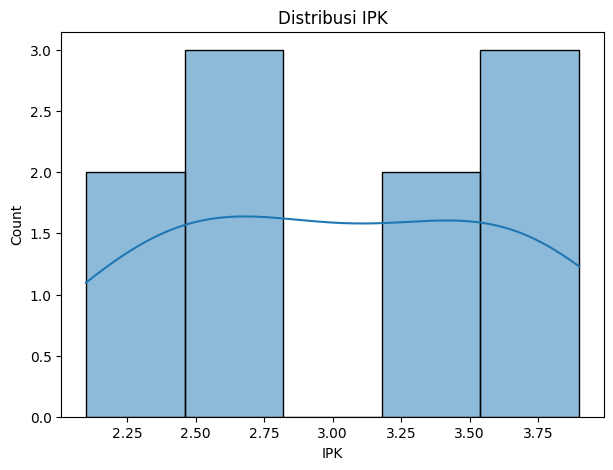

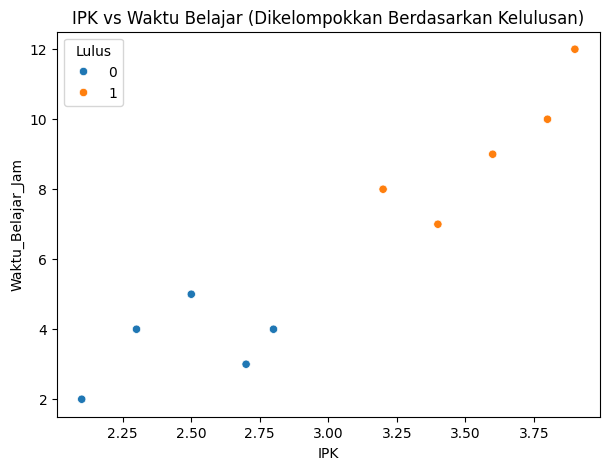

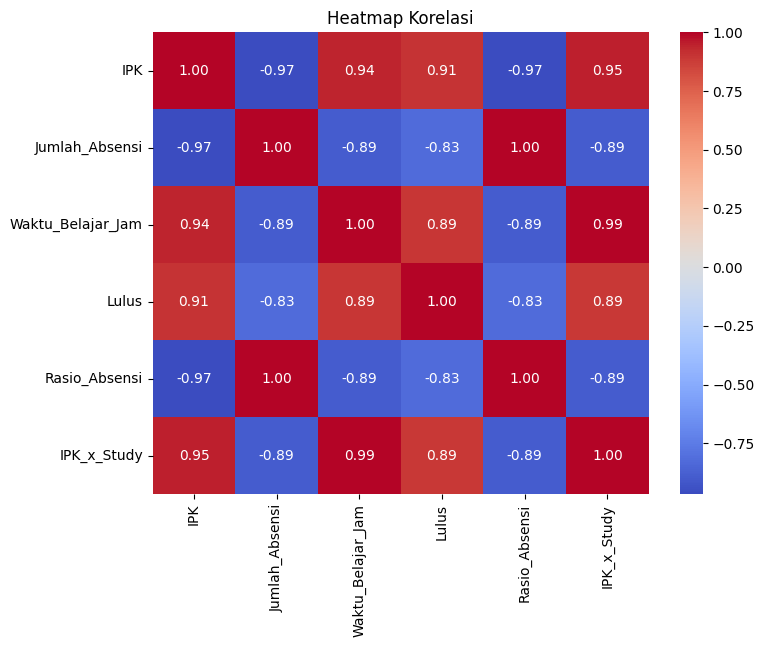


LANGKAH 5: Feature Engineering

Data setelah Feature Engineering (5 Baris Terakhir):
   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus  Rasio_Absensi  IPK_x_Study
5  2.8               6                  4      0       0.428571         11.2
6  3.2               5                  8      1       0.357143         25.6
7  2.7               7                  3      0       0.500000          8.1
8  3.6               4                  9      1       0.285714         32.4
9  2.3               9                  4      0       0.642857          9.2

Data berhasil disimpan ke 'processed_kelulusan.csv'

LANGKAH 6: Splitting Dataset (Train, Val, Test)

Ukuran Akhir Dataset:
X_train shape: (7, 5) | y_train shape: (7,)
X_val shape: (1, 5) | y_val shape: (1,)
X_test shape: (2, 5) | y_test shape: (2,)


In [1]:
# =========================================================
# LEMBAR KERJA PERTEMUAN 4 - DATA PREPARATION
# =========================================================

# Langkah 1 & 2: Collection
# Import Pustaka
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Diperlukan untuk menampilkan plot
from sklearn.model_selection import train_test_split

# Catatan: Pastikan file kelulusan_mahasiswa.csv sudah dibuat
# Ganti nama file sesuai dengan instruksi tugas (kelulusan_mahasiswa.csv)
try:
    df = pd.read_csv(r"C:\.venv\Machine-learning\dataset.csv")
except FileNotFoundError:
    print("ERROR: File 'kelulusan_mahasiswa.csv' tidak ditemukan.")
    print("Pastikan Anda sudah membuat file CSV dan namanya sudah benar.")
    exit()

print("==========================================")
print("LANGKAH 2: Collection & Info")
print("==========================================")
print(df.info())
print("\nData Head:")
print(df.head())


# Langkah 3: Cleaning
print("\n==========================================")
print("LANGKAH 3: Cleaning")
print("==========================================")

# 3a. Periksa Missing Value (Handling jika ada)
print("\nCek Missing Values:")
print(df.isnull().sum())
# Karena dataset kecil, kita asumsikan tidak ada missing value,
# tetapi jika ada, Anda akan menanganinya di sini (misalnya: df['Kolom'].fillna(df['Kolom'].median(), inplace=True))

# 3b. Hapus data duplikat
print(f"\nJumlah baris sebelum drop duplikat: {len(df)}")
df = df.drop_duplicates()
print(f"Jumlah baris setelah drop duplikat: {len(df)}")

# 3c. Identifikasi outlier dengan boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['IPK'])
plt.title('Boxplot IPK untuk Identifikasi Outlier')
plt.show() # Tampilkan plot


# Langkah 4: Exploratory Data Analysis (EDA)
print("\n==========================================")
print("LANGKAH 4: Exploratory Data Analysis (EDA)")
print("==========================================")

# 4a. Hitung statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# 4b. Buat histogram distribusi IPK
plt.figure(figsize=(7, 5))
sns.histplot(df['IPK'], bins=5, kde=True) # bins diperkecil karena data sedikit
plt.title('Distribusi IPK')
plt.show()

# 4c. Visualisasi scatterplot (IPK vs Waktu Belajar)
plt.figure(figsize=(7, 5))
sns.scatterplot(x='IPK', y='Waktu_Belajar_Jam', data=df, hue='Lulus')
plt.title('IPK vs Waktu Belajar (Dikelompokkan Berdasarkan Kelulusan)')
plt.show()

# 4d. Tampilkan heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()


# Langkah 5: Feature Engineering
print("\n==========================================")
print("LANGKAH 5: Feature Engineering")
print("==========================================")

# 5a. Buat fitur turunan baru
df['Rasio_Absensi'] = df['Jumlah_Absensi'] / 14
df['IPK_x_Study'] = df['IPK'] * df['Waktu_Belajar_Jam']
print("\nData setelah Feature Engineering (5 Baris Terakhir):")
print(df.tail())

# 5b. Simpan file yang diproses
df.to_csv(r"C:\.venv\Machine-learning\dataset.csv", index=False)
print("\nData berhasil disimpan ke 'processed_kelulusan.csv'")


# Langkah 6: Splitting Dataset
print("\n==========================================")
print("LANGKAH 6: Splitting Dataset (Train, Val, Test)")
print("==========================================")

X = df.drop('Lulus', axis=1)
y = df['Lulus']

# Split 1: Pisahkan Training (70%) dan Temporary (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# --- PENTING: Solusi untuk Error ValueError ---
# Karena dataset Anda sangat kecil (hanya 10 baris) dan y_temp hanya 3 baris (30%),
# stratifikasi pada split kedua hampir pasti akan gagal.
# Kita HARUS menghapus 'stratify' dari split kedua, atau membersihkan data y_temp.
# Solusi: Hapus 'stratify' dari split kedua (metode tercepat).

# Split 2: Pisahkan Temporary (30%) menjadi Validation (15%) dan Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42) 
# Perhatikan: 'stratify=y_temp' sudah DIHAPUS untuk menghindari ValueError

# Cek ukuran akhir
print("\nUkuran Akhir Dataset:")
print(f"X_train shape: {X_train.shape} | y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape} | y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape} | y_test shape: {y_test.shape}")